# Diffusers - Hugging Face

"Diffusers is the go-to library for state-of-the-art pretrained diffusion models for generating images, audio, and even 3D structures of molecules. Whether you're looking for a simple inference solution or training your own diffusion models, 🤗 Diffusers is a modular toolbox that supports both. Our library is designed with a focus on usability over performance, simple over easy, and customizability over abstractions."

(Diffusers Library Info)

### Requirements

In [1]:
%pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0

In [2]:
import numpy as np
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def make_grid(images, size=64):
    """Given a list of PIL images, stack them together into a line for easy viewing"""
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im


# Mac users may need device = 'mps' (untested)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Dreambooth

Dreambooth let's us create our own model variant with some extra knowledge of a specific face, object or style.

Here's an example using a model trained on 5 photos of a popular children's toy called "Mr Potato Head".

In [4]:
from diffusers import StableDiffusionPipeline

model_id = "sd-dreambooth-library/mr-potato-head"

# Pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

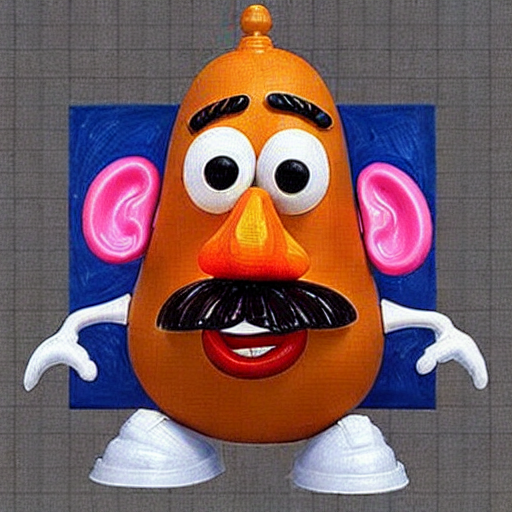

In [7]:
prompt = "an abstract oil painting of sks mr potato head by dali"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

The `'sks'` token represents a unique identifier for the novel concept in this case - what happens if you leave that out? You can also experiment with changing the number of sampling steps (how low can you go?) and the guidance_scale, which determines how much the model will try to match the prompt.

### Minimum Viable Pipeline (MVP)

Pipelines are great for end-users, in this notebook we're going to build our own pipeline capable of generating small butterfly pictures.

  0%|          | 0/1000 [00:00<?, ?it/s]

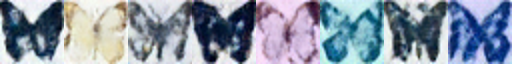

In [9]:
from diffusers import DDPMPipeline

# Load the butterfly pipeline
butterfly_pipeline = DDPMPipeline.from_pretrained(
    "johnowhitaker/ddpm-butterflies-32px"
).to(device)

# Create 8 images
images = butterfly_pipeline(batch_size=8).images

# View the result
make_grid(images)